In [1]:
# import shutil

# total, used, free = shutil.disk_usage("/")

# print("Total: %d GiB" % (total // (2**30)))
# print("Used: %d GiB" % (used // (2**30)))
# print("Free: %d GiB" % (free // (2**30)))

Total: 29684 GiB
Used: 18499 GiB
Free: 9694 GiB


In [ ]:
# from urllib.request import urlretrieve

# url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE176078&format=file&file=GSE176078%5FWu%5Fetal%5F2021%5FBRCA%5FscRNASeq%2Etar%2Egz'
# filename = 'GSE176078_Wu_etal_2021_BRCA_scRNASeq.tar.gz'

# urlretrieve(url, filename)

In [1]:
# import tarfile

# file_path = '/tmp/work/Visium/sean/wu_et_al_2021/GSE176078_Wu_etal_2021_BRCA_scRNASeq.tar.gz'
# extraction_directory = '/tmp/work/Visium/sean/wu_et_al_2021'

# file = tarfile.open(file_path) 
# file.extractall(extraction_directory) 
# file.close()

In [1]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread
import decoupler as dc

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
count_path = '/tmp/work/Visium/sean/Wu_etal_2021_BRCA_scRNASeq/count_matrix_sparse.mtx'
genes_path = '/tmp/work/Visium/sean/Wu_etal_2021_BRCA_scRNASeq/count_matrix_genes.tsv'
barcodes_path = '/tmp/work/Visium/sean/Wu_etal_2021_BRCA_scRNASeq/count_matrix_barcodes.tsv'
metadata_path = '/tmp/work/Visium/sean/Wu_etal_2021_BRCA_scRNASeq/metadata.csv'

count_matrix = mmread(count_path).tocsr()
count_matrix = count_matrix.transpose()  #ensures that genes are in columns and rows are barcodes

genes = pd.read_csv(genes_path, header=None, sep='\t')
barcodes = pd.read_csv(barcodes_path, header=None, sep='\t')
metadata = pd.read_csv(metadata_path, index_col=0)

In [3]:
adata = sc.AnnData(X=count_matrix)
adata.var['gene_names'] = genes[0].values  # Assuming the gene names are in the first column
adata.obs['barcodes'] = barcodes[0].values  # Assuming the barcodes are in the first column
adata.obs['celltype_major'] = metadata['celltype_major'].values  
adata.obs['nCount_RNA'] = metadata['nCount_RNA'].values 
adata.obs['nFeature_RNA'] = metadata['nFeature_RNA'].values
adata.obs['celltype_minor'] = metadata['celltype_minor'].values 
adata.obs['subtype'] = metadata['subtype'].values 

#adata.obs = adata.obs.join(metadata)

adata.var_names = adata.var['gene_names']
adata.obs_names = adata.obs['barcodes']

In [4]:
# normalization, hvg, embeddings and umap 

sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
2024-08-12 08:37:58.005551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


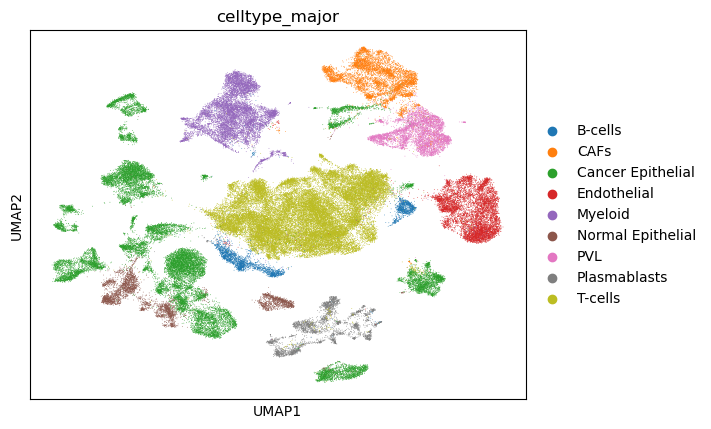

In [5]:
sc.pl.umap(adata, color='celltype_major')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


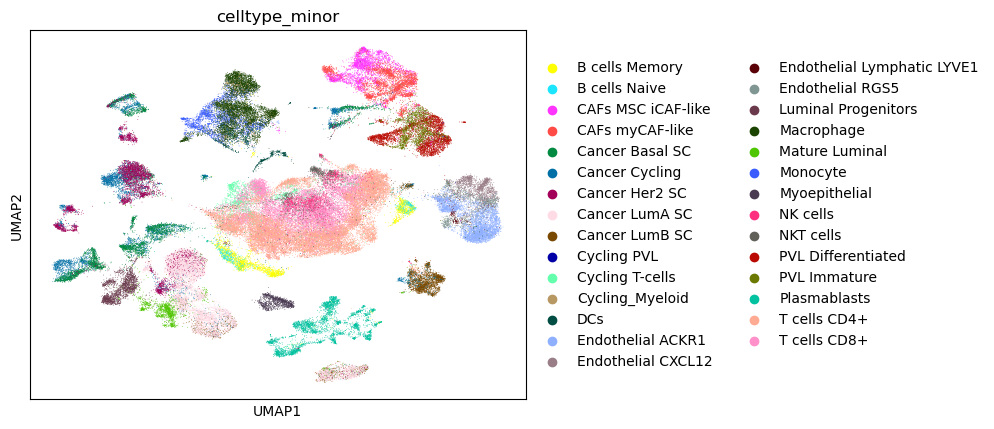

In [6]:
sc.pl.umap(adata, color='celltype_minor')

In [75]:
adata

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'barcodes', 'celltype_major', 'nCount_RNA', 'nFeature_RNA', 'celltype_minor', 'subtype', 'sample'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'celltype_major_colors', 'celltype_minor_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [74]:
adata.obs['sample'] = 'wu'

pdata = dc.get_pseudobulk(
    adata,
    sample_col = 'sample',
    groups_col='celltype_major',
    layer='counts',
    mode='sum',
    min_cells=0,
    min_counts=0
)

KeyError: 'counts'

In [76]:
sc.pp.normalize_total(pdata, target_sum=1e4, inplace=True)  #normalize prior to converting to a dataframe

pb_df = pd.DataFrame(pdata.X)
pb_df.index = pdata.obs['celltype_major']
pb_df.columns = pdata.var['gene_names']
pb_df.to_pickle('wu_2021_pseudobulk.pkl')


In [83]:
print(sum(pdata.layers['psbulk_props'][1,:]))
sum(pdata.layers['psbulk_props'][2,:])


1892.45382625895


2769.285230103453

In [73]:
df_hvg

gene_names,TNFRSF18,TNFRSF4,FAM132A,MXRA8,VWA1,RP11-181G12.2,HES5,AJAP1,TNFRSF9,RBP7,...,LINC00266-3,IFNA2,RP11-983C2.2,NANOGP11,RP11-401H2.1,CTD-2555A7.1,CTD-2243E23.1,RP11-231E4.2,FLJ22763,GRXCR1
barcodes,,,,,,,,,,,,,,,,,,,,,
CID3586_AAGACCTCAGCATGAG,0.0,0.0,0.0,0.0,1.157802,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID3586_AAGGTTCGTAGTACCT,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID3586_ACCAGTAGTTGTGGCC,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID3586_ACCCACTAGATGTCGG,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.127809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID3586_ACTGATGGTCAACTGT,0.0,0.0,0.0,0.0,2.919586,0.0,0.0,0.0,0.0,1.923451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID4398_TCAGGTAGTACTCAAC,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID4398_TCTATTGTCGCCATAA,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CID4398_TCTTTCCCAGTAAGCG,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
